<a href="https://colab.research.google.com/github/joaovpnt/spotify-analysis/blob/main/Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description:

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

# Key Featrues:

    track_name: Name of the song
    artist(s)_name: Name of the artist(s) of the song
    artist_count: Number of artists contributing to the song
    released_year: Year when the song was released
    released_month: Month when the song was released
    released_day: Day of the month when the song was released
    in_spotify_playlists: Number of Spotify playlists the song is included in
    in_spotify_charts: Presence and rank of the song on Spotify charts
    streams: Total number of streams on Spotify
    in_apple_playlists: Number of Apple Music playlists the song is included in
    in_apple_charts: Presence and rank of the song on Apple Music charts
    in_deezer_playlists: Number of Deezer playlists the song is included in
    in_deezer_charts: Presence and rank of the song on Deezer charts
    in_shazam_charts: Presence and rank of the song on Shazam charts
    bpm: Beats per minute, a measure of song tempo
    key: Key of the song
    mode: Mode of the song (major or minor)
    danceability_%: Percentage indicating how suitable the song is for dancing
    valence_%: Positivity of the song's musical content
    energy_%: Perceived energy level of the song
    acousticness_%: Amount of acoustic sound in the song
    instrumentalness_%: Amount of instrumental content in the song
    liveness_%: Presence of live performance elements
    speechiness_%: Amount of spoken words in the song

# Potential Use Cases:

* Music analysis: Explore patterns in audio features to understand trends and preferences in popular songs.
Platform comparison: Compare the song's popularity across different music platforms.
* Artist impact: Analyze how artist involvement and attributes relate to a song's success.
* Temporal trends: Identify any shifts in music attributes and preferences over time.
* Cross-platform presence: Investigate how songs perform across different streaming services.

# An analysis of the most listened to songs on Spotify in 2023

In [1]:
!pip install plotly

In [2]:
# Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Opening the data

url = "https://raw.githubusercontent.com/joaovpnt/spotify-analysis/main/dataset/spotify-2023.csv"

data = pd.read_csv(url, encoding='ISO-8859-1')
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Check the structure of the dataset
num_rows, num_columns = data.shape
num_rows, num_columns

(953, 24)

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

in_shazam_charts    50
key                 95
dtype: int64

In [6]:
# Basic statistics of the numerical columns
data_description = data.describe()
data_description

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
# Data types of all columns
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [8]:
# Remove non-numeric values from 'streams' column and convert to integer
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

## What is the most listened to artist?

In [9]:
# Select the top 10 songs with the most streams and sort them in descending order
top_artist = data[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

In [10]:
# Format the "streams" column with three digits and a "B" at the end
top_artist['formatted_streams'] = top_artist['streams'].apply(lambda x: f'{x/1e9:.2f}B')

# Create a horizontal bar chart with Plotly Express and swap the axes
fig = px.bar(
    top_artist,
    x='streams',            # Swap the X-axis with the Y-axis
    y='artist(s)_name',     # Swap the Y-axis with the X-axis
    orientation='h',        # Horizontal orientation for the bars
    text='formatted_streams',  # Use the formatted column as text on the bars
    title='Top 10 Artists',
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(title='Streams'),  # X-axis title
    yaxis=dict(title='Artist Name'),  # Y-axis title
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Top 10 Artists', x=0.5),  # Center the title
)

# Customize the bar colors to dark green
fig.update_traces(marker_color='green')

# Show the plot
fig.show()


## What is the Top 10 Artists with Most Songs?

In [11]:
# Taking the 10 artists with the most songs
top_artists = data['artist(s)_name'].value_counts().head(10).reset_index()
top_artists.columns = ['Artist(s) Name', 'Number of Songs']

In [12]:
# Create a bar chart with Plotly Express and add the number of songs as text on top of each bar
fig = px.bar(
    top_artists,
    x='Artist(s) Name',
    y='Number of Songs',
    text='Number of Songs',  # Add the 'Number of Songs' column as text on the bars
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(showgrid=False),  # Remove x-axis gridlines
    yaxis=dict(showgrid=False),  # Remove y-axis gridlines
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Top 10 Artists with Most Songs', x=0.5),  # Center the title
)

# Customize the bar colors to green
fig.update_traces(marker_color='green')

# Show the plot
fig.show()

## What is the Top 10 songs with most streams on Spotify?

In [13]:
# Select the top 10 songs with the most streams on Spotify and sort them in ascending order
top_spotify_streams = data[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

In [14]:
# Format the stream values with 3 digits before the comma, 3 digits after the comma, and "B" for billions
top_spotify_streams['formatted_streams'] = top_spotify_streams['streams'].apply(lambda x: f'{x/1e9:.3f}B')

# Create a bar chart with Plotly Express
fig = px.bar(
    top_spotify_streams,
    x='streams',
    y='track_name',
    orientation='h',  # Horizontal orientation for the bars
    text='formatted_streams',   # Use the formatted column as text on the bars
    title='Top 10 Songs with Least Streams on Spotify (Ascending Order)'
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(showgrid=False),  # Remove x-axis gridlines
    yaxis=dict(showgrid=False),  # Remove y-axis gridlines
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Top 10 Songs with Least Streams on Spotify (Ascending Order)', x=0.5),  # Center the title
)

# Customize the bar colors to green
fig.update_traces(marker_color='green')

# Show the plot
fig.show()


## What is the most Valence music?

In [15]:
# Select the top 10 songs with the highest valence and arrange them in descending order
top_valence_music = data[['track_name', 'artist(s)_name', 'valence_%']].sort_values(by='valence_%', ascending=False).head(10)

In [16]:
# Create a horizontal bar chart with Plotly Express
fig = px.bar(
    top_valence_music,
    x='valence_%',
    y='track_name',
    orientation='h',  # Horizontal orientation for the bars
    text='valence_%',  # Use the valence column as text on the bars
    title='Top 10 Songs with Highest Valence',
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(title='Valence %'),  # X-axis title
    yaxis=dict(title='Track Name'),  # Y-axis title
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Top 10 Songs with Highest Valence', x=0.5),  # Center the title
)

# Customize the bar colors to dark green
fig.update_traces(marker_color='darkgreen')

# Show the chart
fig.show()


## What songs appear most on playlists?

In [17]:
# Select the top 10 songs that appear most frequently in Spotify playlists and arrange them in descending order
top_music_in_spotify_playlists = data[['track_name', 'artist(s)_name', 'in_spotify_playlists']].sort_values(by='in_spotify_playlists', ascending=False).head(10)

In [18]:
# Create a horizontal bar chart with Plotly Express and swap the axes
fig = px.bar(
    top_music_in_spotify_playlists,
    x='in_spotify_playlists',  # Swap the X-axis with the Y-axis
    y='track_name',            # Swap the Y-axis with the X-axis
    orientation='h',           # Horizontal orientation for the bars
    text='in_spotify_playlists',  # Use the "in_spotify_playlists" column as text on the bars
    title='Top 10 Songs that appear most on playlists',
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(title='in_spotify_playlists'),  # X-axis title
    yaxis=dict(title='Track Name'),  # Y-axis title
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Top 10 Songs that appear most on playlists', x=0.5),  # Center the title
)

# Customize the bar colors to dark green
fig.update_traces(marker_color='darkgreen')

# Show the chart
fig.show()


## Calculations on Danceability

In [19]:
import plotly.figure_factory as ff

# Create a figure with a histogram and KDE
fig = ff.create_distplot(
    [data['danceability_%']],
    ['Danceability (%)'],
    bin_size=2,  # Tamanho dos bins
    colors=['darkgreen'],  # Cor das barras e da linha de densidade
    show_rug=False,  # Remova a linha de rug no eixo x
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(title='Danceability (%)'),  # x-axis title
    yaxis=dict(title='Density'),           # y-axis title
    font=dict(color='white', size=16),     # Increase font size and set font color to white
    title=dict(text='Distribution of Danceability with KDE', x=0.5),  # Center the title
)

# Show the plot
fig.show()


# Calculate average danceability for each year

In [20]:
# Calculate average danceability for each year
average_danceability_by_year = data.groupby('released_year')['danceability_%'].mean().reset_index()

In [21]:
import plotly.graph_objects as go

# Calculate average danceability for each year
average_danceability_by_year = data.groupby('released_year')['danceability_%'].mean().reset_index()

# Create a line chart with Plotly
fig = go.Figure()

# Add a line trace for danceability trends
fig.add_trace(go.Scatter(
    x=average_danceability_by_year['released_year'],
    y=average_danceability_by_year['danceability_%'],
    mode='lines',
    line=dict(color='green'),
    name='Average Danceability (%)'
))

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    xaxis=dict(title='Year'),  # x-axis title
    yaxis=dict(title='Average Danceability (%)'),  # y-axis title
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Trends in Danceability Over the Years', x=0.5),  # Center the title
    xaxis_showgrid=False,  # Remove x-axis gridlines
    yaxis_showgrid=False,  # Remove y-axis gridlines
    legend=dict(font=dict(size=12)),  # Decrease legend font size
)

# Define a custom color palette for each decade
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Add arrows with date and percentage to each decade from 1940
years = average_danceability_by_year['released_year']
if len(years) >= 7:
    num_decades = len(range(1940, max(years) + 1, 10))
    for decade, color in zip(range(1940, max(years) + 1, 10), color_palette):
        year = years[years >= decade].min()
        average = average_danceability_by_year.loc[average_danceability_by_year['released_year'] == year, 'danceability_%'].values[0]
        fig.add_trace(go.Scatter(
            x=[year],
            y=[average],
            text=[f'{decade}s: {average:.2f}%'],
            mode='markers+text',
            marker=dict(size=10, color=color),
            name=f'{decade}s',
        ))

# Show the plot
fig.show()


## Working with Correlation

In [22]:
# Select columns for cross-platform metrics
cross_platform_columns = [
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
]

# Calculate the correlation matrix
correlation_matrix = data[cross_platform_columns].corr()

<ipython-input-22-4981591dcec1>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



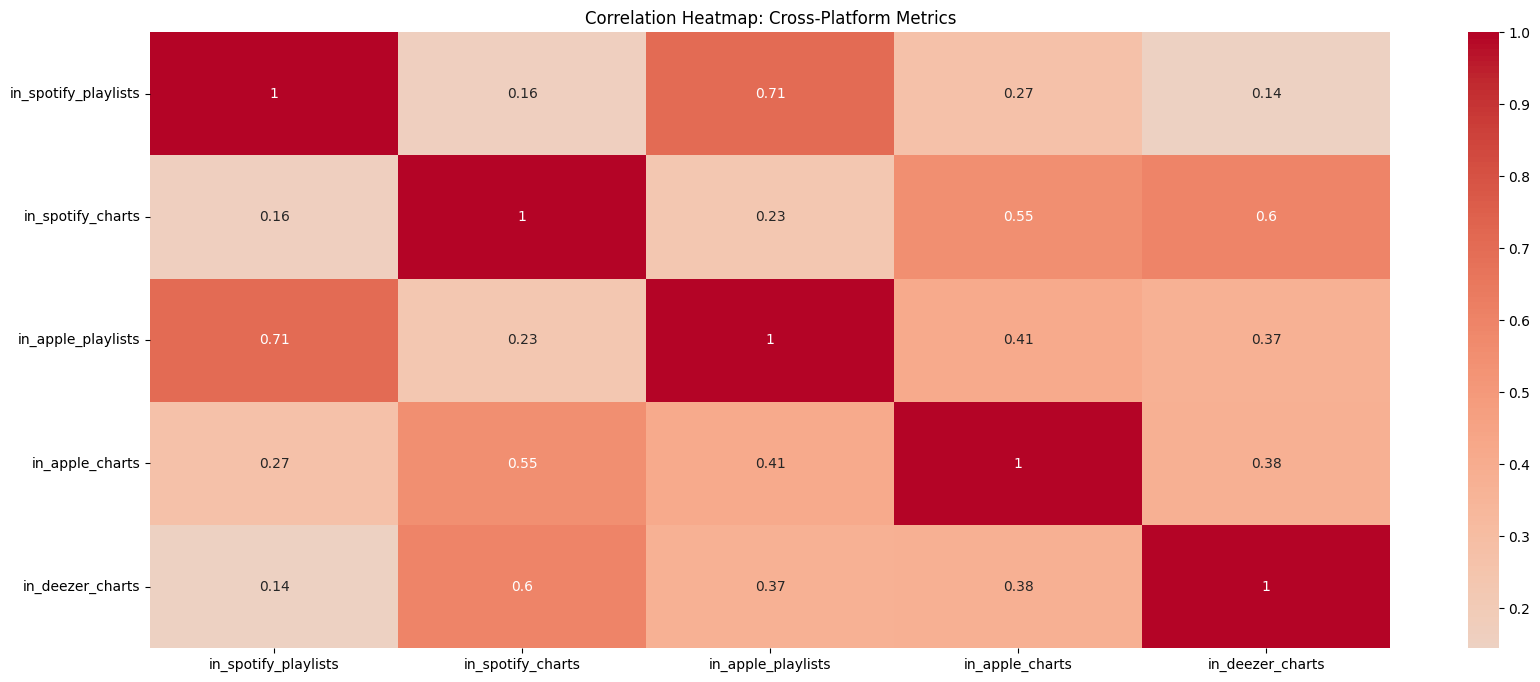

In [23]:
# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

In [24]:
# Select columns for audio features
audio_features_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']

# Calculate the correlation matrix
correlation_matrix = data[audio_features_columns].corr()

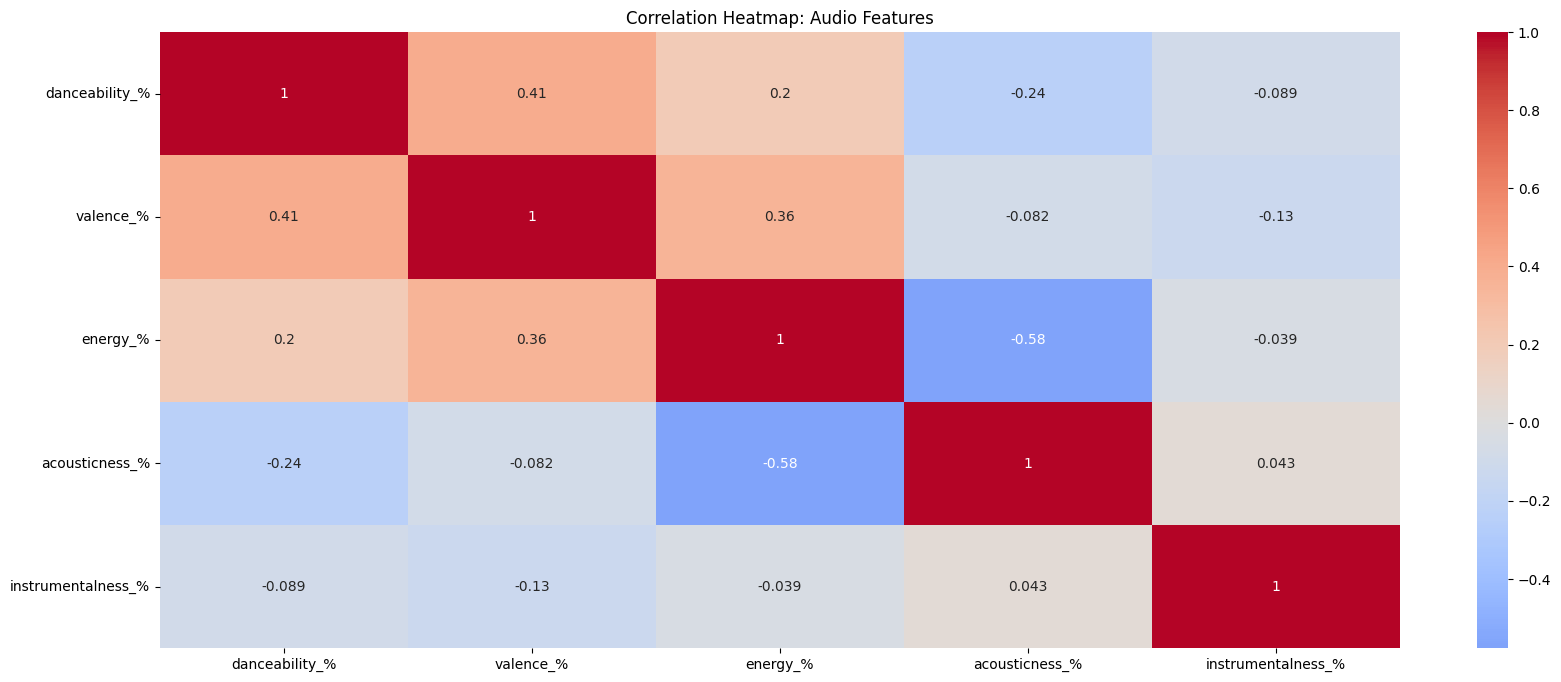

In [25]:
# Create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Audio Features')
plt.show()

## Other Comparations

In [26]:
# Select columns for audio features and popularity
audio_features_columns = ['danceability_%', 'energy_%', 'valence_%']
popularity_column = 'streams'

In [27]:
# Create scatter plots with Plotly Express and map colors based on the audio features columns
fig = px.scatter(
    data,
    x=audio_features_columns[0],  # First audio feature
    y=popularity_column,
    color=audio_features_columns[0],  # Map colors based on the first audio feature
    labels={'x': 'Danceability', 'y': 'Number of Streams'},
    title=f'Danceability vs. Number of Streams',
)

# Customize the layout
fig.update_layout(
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    font=dict(color='white', size=12),  # Increase font size and set font color to white
)

# Show the scatter plot
fig.show()

# Repeat the process for the other two audio features
for feature in audio_features_columns[1:]:
    fig = px.scatter(
        data,
        x=feature,
        y=popularity_column,
        color=feature,  # Map colors based on the current audio feature
        labels={'x': feature.capitalize(), 'y': 'Number of Streams'},
        title=f'{feature.capitalize()} vs. Number of Streams',
    )

    # Customize the layout
    fig.update_layout(
        plot_bgcolor='black',  # Set the background to black
        paper_bgcolor='black', # Set the paper background to black
        font=dict(color='white', size=12),  # Increase font size and set font color to white
    )

    # Show the scatter plot
    fig.show()


## Danceability x Popularity

In [28]:
import plotly.express as px

# Create scatter plot for Popularity vs. Danceability
fig = px.scatter(data, x='danceability_%', y='streams', title='Popularity vs. Danceability')

# Customize the layout
fig.update_layout(
    xaxis_title='Danceability (%)',
    yaxis_title='Number of Streams',
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Popularity vs. Danceability', x=0.5),  # Center and enlarge the title
)

# Customize the marker color to green
fig.update_traces(marker=dict(color='green'))

# Show the scatter plot
fig.show()

## Valence (Positivity) Distribution by Year

In [29]:
import plotly.express as px

# Create box plot for Valence distribution by Year
fig = px.box(data, x='released_year', y='valence_%', title='Valence Distribution by Year')

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Valence (%)',
    plot_bgcolor='black',  # Set the background to black
    paper_bgcolor='black', # Set the paper background to black
    font=dict(color='white', size=16),  # Increase font size and set font color to white
    title=dict(text='Valence Distribution by Year', x=0.5),  # Center and enlarge the title
)

# Customize the box plot color to green
fig.update_traces(line_color='green')

# Show the box plot
fig.show()

### Thanks for Visiting!